### Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import sys
import copy

In [2]:
%matplotlib inline

In [3]:
# converting color mode from BGR to RGB and displaying the image as matplotlib figure
def matplotlib_imshow_bgr2rgb(img_title="", mat_img=None, fig_h=7):
    # tinkering with size
    try:
        img_width, img_height = mat_img.shape[0], mat_img.shape[1]
        aspect_ratio = img_width / img_height
        plt.figure(figsize=(fig_h * aspect_ratio, fig_h))
    except AttributeError:
        print(
            "None Type image. Correct_syntax is, matplotlib_imshow_bgr2rgb(img_title, mat_img, fig_h)."
        )

    # actual code for displaying the image
    plt.imshow(cv.cvtColor(mat_img, cv.COLOR_BGR2RGB))
    plt.title(img_title)
    plt.show()

## Image Filtering ([Docs](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html))

As in one-dimensional signals, images can also be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc. `LPF helps in removing noise, blurring images`, etc. `HPF filters help in finding edges` in images.

OpenCV provides a function `cv.filter2D(src, ddepth, kernel, anchor=(-1, -1))` to convolve a kernel with an image.

<u>Function Arguments</u>
- src: image to which filter is to be applied.
- ddepth: depth of the output image [ -1 will give the output image depth as same as the input image]
- *kernel:* convolution kernel. it is nothing but a matrix representing the coefficients of the filter.
- anchor: anchor of the kernel that indicates the relative position of a filtered point within the kernel; default value (-1,-1) means that the anchor is at the kernel center.

- ### Convolution ([Wikipedia](https://en.wikipedia.org/wiki/Convolution))

Convolution is a mathematical operation on two functions (`f and g`) that produces a third function (`f ∗ g`) which expresses how the `shape of one is modified by the other`.

<img src="convolution-operation-example.png" width=400 height=200> 

The term convolution refers to both the result function and to the process of computing it. It is defined as the `integral of the product of the two functions after one is reflected about the y-axis and shifted`. The choice of which function is reflected and shifted before the integral does not change the integral result. The integral is evaluated for all values of shift, producing the convolution function.

<img src="convolution-mathematical-definition.png">

##### **Kernel**

`Kernel:` In image processing, a kernel, convolution matrix, or mask is a small matrix used for blurring, sharpening, embossing, edge detection, and more. This is accomplished by doing a convolution between the kernel and an image. Or more simply, when each pixel in the output image is a function of the nearby pixels (including itself) in the input image, the kernel is that function.  

- See this [opencv tutorial](https://docs.opencv.org/3.4/d4/dbd/tutorial_filter_2d.html) to learn how exactly a kernel is applied to an image to bring about such different types of changes. 
- See this [wikipedia article](https://en.wikipedia.org/wiki/Kernel_(image_processing)) to learn more about what is a kernel, common kernel matrices, application, implementation etc.

- ### Image Smoothing ([Wikipedia](https://en.wikipedia.org/wiki/Smoothing))

In statistics and image processing, to smooth a data set is to create an approximating function that attempts to capture important patterns in the data, while leaving out noise or other fine-scale structures/rapid phenomena. In smoothing, the data points of a signal are modified so `individual points higher than the adjacent points (presumably because of noise) are reduced, and points that are lower than the adjacent points are increased` leading to a smoother signal.

<img src="smoothing-theory.png">

Many different algorithms are used for image smoothing which is also known as blurring. The most commonly used ones in OpenCV are, `cv.blur()`, `cv.GaussianBlur()`, `cv.medianBlur()`, `cv.bilateralFilter()`. To learn more about them see the [docs](https://docs.opencv.org/3.4/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html).

In [4]:
# reading in a noisy image
dog_noisy_img = cv.imread(
    "dog_noisy_img.png", 0
)  # reading mode is 0 i.e, image will be read as grayscale

> Blurring images with `cv.blur(src, kernel_size_tuple)`

In [5]:
normal_blur = cv.blur(dog_noisy_img, ksize=(3, 3))

> Blurring images with `cv.GaussianBlur(src, ksize_tuple, sigmaX, sigmaY)`

<u>Function Parameters</u>
- sigmaX: Gaussian kernel standard deviation in X direction.
- sigmaY: Gaussian kernel standard deviation in Y direction.

In [6]:
gaussian_blur = cv.GaussianBlur(dog_noisy_img, (3, 3), sigmaX=1, sigmaY=1)

> Blurring images with `cv.medianBlur(src, ksize_int)`

In [7]:
median_blur = cv.medianBlur(dog_noisy_img, 3)

> Blurring images with `cv.bilateralFilter(src, d, sigmaColor, sigmaSpace)`

<u>Function Parameters</u>
- d: Diameter of each pixel neighborhood that is used during filtering.
- sigmaSpace: a larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough. When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace. 
- sigmaColor: larger value of the parameter means that farther colors within the pixel neighborhood will be mixed together, resulting in larger areas of semi-equal color. 

In [8]:
bilateral_filter_blur = cv.bilateralFilter(
    dog_noisy_img, 5, sigmaSpace=10, sigmaColor=15
)

> Showing the effects of different blurring algorithms 

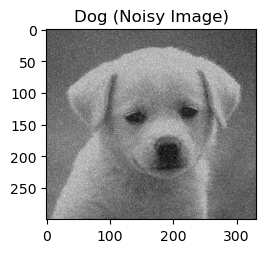

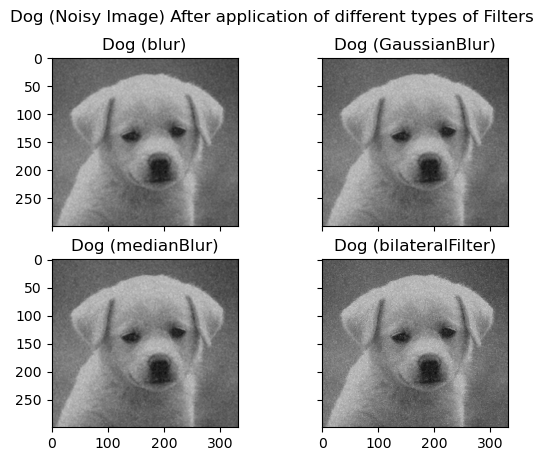

In [9]:
# Original Image
matplotlib_imshow_bgr2rgb("Dog (Noisy Image)", dog_noisy_img, 3)

# Blurred Images
fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2, 2, sharex=True, sharey=True)

ax11.imshow(cv.cvtColor(normal_blur, cv.COLOR_GRAY2RGB))
ax11.set_title("Dog (blur)")

ax12.imshow(cv.cvtColor(gaussian_blur, cv.COLOR_GRAY2RGB))
ax12.set_title("Dog (GaussianBlur)")

ax21.imshow(cv.cvtColor(median_blur, cv.COLOR_GRAY2RGB))
ax21.set_title("Dog (medianBlur)")

ax22.imshow(cv.cvtColor(bilateral_filter_blur, cv.COLOR_GRAY2RGB))
ax22.set_title("Dog (bilateralFilter)")

fig.suptitle("Dog (Noisy Image) After application of different types of Filters")

plt.show()

- ### Non-Local Means Image Denoising ([Docs](https://docs.opencv.org/3.4/d5/d69/tutorial_py_non_local_means.html))

We have already seen many image smoothing techniques like Gaussian Blurring, Median Blurring etc and they were good to some extent in removing small quantities of noise. In those techniques, we took a small neighbourhood around a pixel and did some operations like gaussian weighted average, median of the values etc to replace the central element. In short, noise removal at a pixel was local to its neighbourhood.

To improve the denoising quality of images, we can use `Non-Local Means Denoising` technique. Although one significant drawback is that this process is computationally very demanding.

This technique utilizes an interesting property of noise. *Noise is generally considered to be a random variable with zero mean.* Consider a noisy pixel, p=p0+n where p0 is the true value of pixel and n is the noise in that pixel. You can take large number of same pixels (say N) from different images and compute their average. Ideally, you should get p=p0 since mean of noise is zero. So the idea is simple, we need a set of similar images to average out the noise.

Consider a small window (say 5x5 window) in the image. Chance is large that the same patch may be somewhere else in the image. Sometimes in a small neighbourhood around it. What about using these similar patches together and find their average? For that particular window, that is fine. And this is what we do in *Non-Local Means Denoising*.

See an example image below:

<img src="denoising_opencv.jpg">

The blue patches in the image looks the similar. Green patches looks similar. So we take a pixel, take small window around it, search for similar windows in the image, average all the windows and replace the pixel with the result we got. This method is Non-Local Means Denoising. It takes more time compared to blurring techniques we saw earlier, but its result is very good.

OpenCV provides 4 variations of this technique.
- For operation on a single image,
    - `cv.fastNlMeansDenoising()` for grayscale image
    - `cv.fastNlMeansDenoisingColored()` for colored image
    
    <u>Parameters</u>
    - src: Input image.
    - templateWindowSize: Size in pixels of the template patch that is used to compute weights. Should be odd. Recommended value 7 pixels.
    - searchWindowSize: Size in pixels of the window that is used to compute weighted average for given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater denoising time. Recommended value 21 pixels.
    - h: Parameter regulating filter strength. Bigger h value perfectly removes noise but also removes image details, smaller h value preserves details but also preserves some noise.


- For working with image sequence captured in short period of time,
    - `cv.fastNlMeansDenoisingMulti()` for grayscale image
    - `cv.fastNlMeansDenoisingColoredMulti()` for colored image

    <u>Parameters</u>
    - srcImgs: sequence of input images. All images should have the same type and size. 
    - imgToDenoiseIndex: Index of the target image to denoise in srcImgs sequence.
    - temporalWindowSize: Number of surrounding images to use for target image denoising. Should be odd.
    - templateWindowSize: Size in pixels of the template patch that is used to compute weights. Should be odd. Recommended value 7 pixels.
    - searchWindowSize: Size in pixels of the window that is used to compute weighted average for given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater denoising time. Recommended value 21 pixels.
    - h: Parameter regulating filter strength. Bigger h value perfectly removes noise but also removes image details, smaller h value preserves details but also preserves some noise.


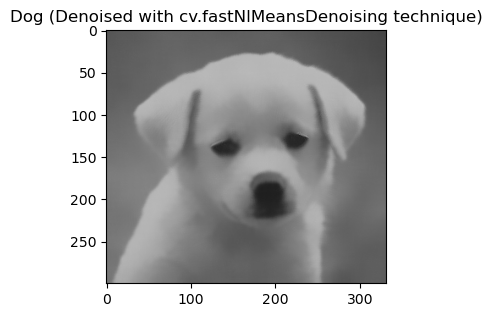

In [10]:
# cv.fastNlMeansDenoising() used on the dog_noisy_img
denoise_gray = cv.fastNlMeansDenoising(dog_noisy_img, 7, 21, 7)
matplotlib_imshow_bgr2rgb(
    "Dog (Denoised with cv.fastNlMeansDenoising technique)", denoise_gray, 4
)

- ### Sharpening Images

Sharpening an image is the process of increasing the contrast between adjacent pixels to enhance the details in an image. This can be useful for a number of different image processing tasks, such as improving the clarity of an image, restoring details that have been lost due to blurring, or making an image appear more vivid and crisp.

We will need to use the `cv.filter2D(src, ddepth, kernel, anchor)` function. As the kernel, we will use the [standard sharpening kernel](https://wikimedia.org/api/rest_v1/media/math/render/svg/beb8b9a493e8b9cf5deccd61bd845a59ea2e62cc).

In [11]:
sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

In [12]:
denoised_dog_sharpened = cv.filter2D(
    denoise_gray, ddepth=-1, kernel=sharpening_kernel, anchor=(-1, -1)
)

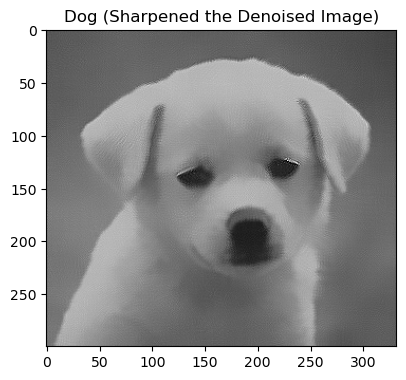

In [13]:
matplotlib_imshow_bgr2rgb(
    "Dog (Sharpened the Denoised Image)", denoised_dog_sharpened, 5
)

## Adding Artificial Noise to an Image